In [29]:
from scipy import io
from sklearn import svm
from sklearn import metrics
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Exploratory Data Analysis

In [2]:
#reading the dataset
dataset=pd.read_csv("Data Science Evaluation.csv")

In [4]:
#showing the first few rows
dataset.head(10)

,Region,Country,Item Type,Fiscal Year,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Profit as % of Cost
0,Sub-Saharan Africa,Cote d'Ivoire,Snacks,2010,Online,C,4/23/10,241891753,4/26/10,10000,152.58,97.44,1525800.00,974400.00,551400.00,0.565887
1,Sub-Saharan Africa,Ethiopia,Snacks,2010,Online,H,6/6/10,530075585,7/1/10,10000,152.58,97.44,1525800.00,974400.00,551400.00,0.565887
2,Central America and the Caribbean,Panama,Clothes,2011,Offline,H,1/2/11,293357980,1/22/11,10000,109.28,35.84,1092800.00,358400.00,734400.00,2.049107
3,Europe,Sweden,Office Supplies,2012,Online,L,10/2/12,360841929,10/20/12,10000,651.21,524.96,6512100.00,5249600.00,1262500.00,0.240495
4,Europe,Romania,Cosmetics,2016,Online,M,3/16/16,707318103,5/3/16,10000,437.20,263.33,4372000.00,2633300.00,1738700.00,0.660274
5,Asia,Maldives,Beverages,2017,Offline,C,7/28/17,932613790,8/13/17,10000,47.45,31.79,474500.00,317900.00,156600.00,0.492608
6,Sub-Saharan Africa,Tanzania,Beverages,2012,Online,L,6/28/12,773619306,7/19/12,9999,47.45,31.79,474452.55,317868.21,156584.34,0.492608
7,Australia and Oceania,Tonga,Clothes,2013,Online,H,2/2/13,414538466,3/5/13,9999,109.28,35.84,1092690.72,358364.16,734326.56,2.049107
8,Middle East and North Africa,Pakistan,Clothes,2013,Online,C,5/9/13,868542897,6/17/13,9999,109.28,35.84,1092690.72,358364.16,734326.56,2.049107
9,Sub-Saharan Africa,Chad,Household,2013,Online,L,11/18/13,876551759,11/22/13,9999,668.27,502.54,6682031.73,5024897.46,1657134.27,0.329785


In [6]:
#Displaying summary statistics
dataset.describe()

,Fiscal Year,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Profit as % of Cost
count,65535.000000,6.553500e+04,65535.000000,65535.000000,65535.000000,6.553500e+04,6.553500e+04,6.553500e+04,65535.000000
mean,2013.309560,5.529922e+08,4987.064500,266.192472,187.606190,1.326827e+06,9.350665e+05,3.917610e+05,0.610672
std,2.199086,2.605409e+08,2890.993357,216.999838,175.613364,1.466334e+06,1.146901e+06,3.784097e+05,0.466814
min,2010.000000,1.000149e+08,1.000000,9.330000,6.920000,3.732000e+01,2.768000e+01,9.640000e+00,0.156846
25%,2011.000000,3.267064e+08,2470.000000,81.730000,56.670000,2.764137e+05,1.626588e+05,9.566828e+04,0.348266
50%,2013.000000,5.521281e+08,4983.000000,205.700000,117.110000,7.873129e+05,4.659253e+05,2.809080e+05,0.565887
75%,2015.000000,7.786878e+08,7500.000000,437.200000,263.330000,1.810119e+06,1.197962e+06,5.632895e+05,0.660274
max,2017.000000,9.999939e+08,10000.000000,668.270000,524.960000,6.682032e+06,5.249600e+06,1.738700e+06,2.049107


In [18]:
#Checking the shape of the dataset and its collumns
print("The columns of the dataset are:",dataset.columns)
print("Its dimension is:",dataset.shape)

The columns of the dataset are: Index(['Region', 'Country', 'Item Type', 'Fiscal Year', 'Sales Channel',
       'Order Priority', 'Order Date', 'Order ID', 'Ship Date', 'Units Sold',
       'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost',
       'Total Profit', 'Profit as % of Cost'],
      dtype='object')
Its dimension is: (65535, 16)


In [150]:
#Checking unique fiscal years, item types, countries and regions
print(dataset["Fiscal Year"].unique())
print(dataset["Item Type"].unique())
print(dataset["Country"].unique())
print(dataset["Region"].unique())

[2010 2011 2012 2016 2017 2013 2014 2015]
['Snacks' 'Clothes' 'Office Supplies' 'Cosmetics' 'Beverages' 'Household'
 'Meat' 'Vegetables' 'Fruits' 'Cereal' 'Baby Food' 'Personal Care']
["Cote d'Ivoire" 'Ethiopia' 'Panama' 'Sweden' 'Romania' 'Maldives'
 'Tanzania' 'Tonga' 'Pakistan' 'Chad' 'Costa Rica' 'Malawi' 'Kyrgyzstan'
 'Fiji' 'Lebanon' 'East Timor' 'Guatemala' 'Denmark' 'Andorra'
 'Mauritania' 'Central African Republic' 'Bulgaria' 'France' 'Belarus'
 'Equatorial Guinea' 'Antigua and Barbuda ' 'Vanuatu' 'Rwanda' 'Djibouti'
 'Morocco' 'Saint Kitts and Nevis ' 'Iraq' 'Azerbaijan' 'Lesotho'
 'Macedonia' 'Austria' 'Togo' 'United States of America' 'Ghana' 'Nigeria'
 'Libya' 'Croatia' 'Sao Tome and Principe' 'Zambia' 'Georgia'
 'South Africa' 'China' 'Malta' 'Lithuania' 'Turkey' 'Palau' 'Niger'
 'Turkmenistan' 'Egypt' 'Indonesia' 'Malaysia' 'San Marino' 'Italy'
 'Namibia' 'Slovenia' 'Thailand' 'Gabon' 'Tuvalu' 'India' 'Slovakia'
 'Comoros' 'Barbados' 'Bosnia and Herzegovina' 'Mali' 'Norw

In [24]:
#Cleaning the data
dataset.isnull().sum() #Checking if there are null entries

Region                 0
Country                0
Item Type              0
Fiscal Year            0
Sales Channel          0
Order Priority         0
Order Date             0
Order ID               0
Ship Date              0
Units Sold             0
Unit Price             0
Unit Cost              0
Total Revenue          0
Total Cost             0
Total Profit           0
Profit as % of Cost    0
dtype: int64

Looks great! We don't have any missing values!

Now we go on to check if there are outliers. We can see that "Total Revenue", "Total Cost",	"Total Profit",	"Profit as % of Cost" are generated from "Units Sold", "Unit Price", "Unit Cost"; hence we only need to check these three columns.

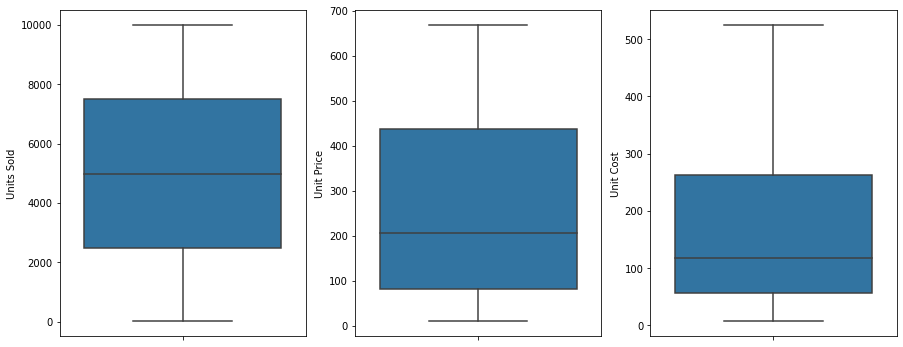

In [43]:
#generate boxplots for these 3 columns
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
sns.boxplot(y=dataset["Units Sold"])

plt.subplot(1,3,2)
sns.boxplot(y=dataset["Unit Price"])

plt.subplot(1,3,3)
sns.boxplot(y=dataset["Unit Cost"])

plt.show();

Looks like we don't have any outliers! The dataset looks really clean and the relationship between the numeric columns are quite clear. So now I think we can directly dive into the tasks.

# 2. Tasks

1. Suggest which products should be dropped from selling in the next year moving forward and which products should be sold more. Should any region be given preference over the other?
(hint: look at the profitability)

For this task, "Profit as % of Cost" column gives us a good indicator of the profitability of a certain product in a certain country during a fiscal year. To predict this, first we may want to visually look at the trend of profitability for each products during the given fiscal years.

In [54]:
#First we may want to calculate the overall profitability of a product in all regions during each fiscal year
#Creating a subset of the dataset
data_prof=dataset[["Region","Item Type","Fiscal Year","Total Cost","Total Profit"]]
by_product_fisyr=data_prof.groupby(by=["Item Type","Fiscal Year"]).sum()
by_product_fisyr["Profit as % of Cost"]=by_product_fisyr["Total Profit"]/by_product_fisyr["Total Cost"]
by_product_fisyr

Total Cost  Total Profit  Profit as % of Cost
Item Type  Fiscal Year                                                 
Baby Food  2010         5.634069e+08  3.387792e+08             0.601305
           2011         6.195473e+08  3.725367e+08             0.601305
           2012         5.426116e+08  3.262749e+08             0.601305
           2013         5.368818e+08  3.228295e+08             0.601305
           2014         5.919947e+08  3.559692e+08             0.601305
...                              ...           ...                  ...
Vegetables 2013         3.285865e+08  2.281278e+08             0.694270
           2014         3.112221e+08  2.160723e+08             0.694270
           2015         3.288993e+08  2.283450e+08             0.694270
           2016         3.423739e+08  2.377000e+08             0.694270
           2017         1.904371e+08  1.322148e+08             0.694270

[96 rows x 3 columns]

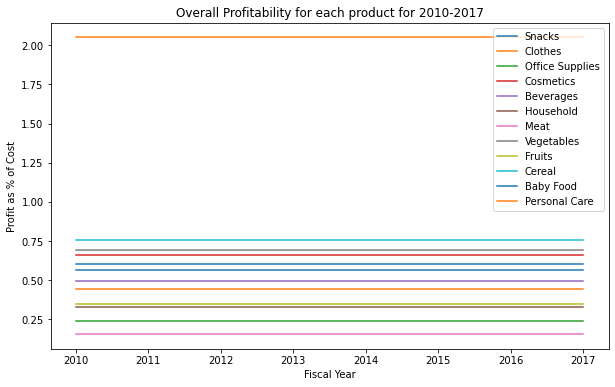

In [91]:
#generate visualization
plt.figure(figsize=(10,6))
for i in ['Snacks', 'Clothes', 'Office Supplies', 'Cosmetics', 'Beverages', 'Household',
 'Meat', 'Vegetables', 'Fruits', 'Cereal', 'Baby Food', 'Personal Care']:
    new=by_product_fisyr.loc[i,"Profit as % of Cost"]
    plt.plot(new.index,new,label=i)

plt.legend()
plt.xlabel("Fiscal Year")
plt.ylabel("Profit as % of Cost")
plt.title("Overall Profitability for each product for 2010-2017");

Very surprisingly, the overall profitability for each product is stationary throughout all fiscal years. This suggests an inherent issue with the dataset. After looking into the data, the unit price and unit cost for a certain item type are the same across all countries and over all fiscal years, which is very unlikely; in addition, we only have information about "units sold", but cannot access "units unsold"; although clothes are highly profitable, in the real world, it usually sells slower than daily necessities. Of course, in this analysis, clothes should be sold more, but in the real world, how to sell more is a more realistic problem; for the sake of practice, though, we will ignore this detail and go on.

Obviously, clothes should be sold more because its profitability is way above other products; on the other hand, meat should be sold less, because it's very unprofitable.

Now we want to think about which regions should be give preference for clothes sales.

In [98]:
#generating new dataset for clothes by region
by_clothes=data_prof.loc[data_prof["Item Type"]=="Clothes"]
by_clothes=by_clothes.groupby(by=["Region","Fiscal Year"]).sum() #groupby region and fiscal year; then add cost and profits
by_clothes["Profit as % of Cost"]=by_clothes["Total Profit"]/by_clothes["Total Cost"]
by_clothes

Total Cost  Total Profit  \
Region                            Fiscal Year                              
Asia                              2010         18848435.20   38622463.20   
                                  2011         19664404.48   40294471.68   
                                  2012         17046973.44   34931075.04   
                                  2013         21908239.36   44892329.76   
                                  2014         17895843.84   36670501.44   
                                  2015         18671027.20   38258935.20   
                                  2016         17442288.64   35741118.24   
                                  2017         10582620.16   21684922.56   
Australia and Oceania             2010          9937966.08   20363957.28   
                                  2011          8488990.72   17394851.52   
                                  2012         10565201.92   21649230.72   
                                  2013          7556971.52   15485044.32   
                                  2014          9106513.92   18660222.72   
                                  2015          8660341.76   17745968.16   
                                  2016          8869647.36   18174857.76   
                                  2017          6348267.52   13008280.32   
Central America and the Caribbean 2010         13921904.64   28527474.24   
                                  2011         13425807.36   27510917.76   
                                  2012         14918973.44   30570575.04   
                                  2013         14888760.32   30508665.12   
                                  2014         13442437.12   27544993.92   
                                  2015         11957836.80   24502888.80   
                                  2016         15836549.12   32450785.92   
                                  2017          9038346.24   18520539.84   
Europe                            2010         35456798.72   72654779.52   
                                  2011         35547832.32   72841317.12   
                                  2012         33861775.36   69386405.76   
                                  2013         32519495.68   66635930.88   
                                  2014         34752256.00   71211096.00   
                                  2015         31992289.28   65555628.48   
                                  2016         38492303.36   78874853.76   
                                  2017         21214448.64   43470678.24   
Middle East and North Africa      2010         13756897.28   28189356.48   
                                  2011         16081336.32   32952381.12   
                                  2012         14362091.52   29429464.32   
                                  2013         17497374.72   35853995.52   
                                  2014         12452392.96   25516287.36   
                                  2015         14302382.08   29307113.28   
                                  2016         12893941.76   26421068.16   
                                  2017          9754931.20   19988899.20   
North America                     2010          3667901.44    7515923.04   
                                  2011          1880023.04    3852368.64   
                                  2012          3186606.08    6529697.28   
                                  2013          2156098.56    4418076.96   
                                  2014          4416312.32    9049497.12   
                                  2015          2042449.92    4185198.72   
                                  2016           951086.08    1948877.28   
                                  2017          2671155.20    5473483.20   
Sub-Saharan Africa                2010         32848757.76   67310624.16   
                                  2011         35464325.12   72670201.92   
                                  2012         30571627.52   62644540.32   
                    

Looks like region-wise, Profit as % of Cost is still stationary.

In [103]:
#checking if the last column of the dataset is correctly calculated
np.allclose(dataset["Total Profit"]/dataset["Total Cost"],dataset["Profit as % of Cost"],rtol=0.0000001) 

True

In [107]:
#Since all other things equal, to decide which region to give preference, we may think in terms of purchasing power#
#which can be indicated by cost
by_clothes.groupby(by="Region").mean().sort_values(by="Total Cost",ascending=False)

,Total Cost,Total Profit,Profit as % of Cost
Region,,,
Sub-Saharan Africa,33235301.12,68102692.92,2.049107
Europe,32979649.92,67578836.22,2.049107
Asia,17757479.04,36386977.14,2.049107
Middle East and North Africa,13887668.48,28457320.68,2.049107
Central America and the Caribbean,13428826.88,27517105.08,2.049107
Australia and Oceania,8691737.60,17810301.60,2.049107
North America,2621454.08,5371640.28,2.049107


On average, Sub-Saharan Africa and Europe are the main markets and these regions should continue to be given preference.

Conclusion: clothes should be sold more because its profitability is way above other products; 
    on the other hand, meat should be sold less, because it's very unprofitable. 
    Sub-Saharan Africa and Europe are the main markets of clothes and these regions should continue to be given preference.

-------------------------------------------------------------------

2. Which products are the easiest to sell. (hint: look at the ship date and order date) by region. Is there a relationship between products or region.


In [116]:
#To look at ship dates and order dates quantitatively to need to tranform them into pd datetime objects
dataset["Order Time Datetime"]=pd.to_datetime(dataset["Order Date"])
dataset["Ship Time Datetime"]=pd.to_datetime(dataset["Ship Date"])
dataset["Time Difference"]=dataset["Ship Time Datetime"]-dataset["Order Time Datetime"]

In [119]:
#Now we have the time difference between ordering and shipping
dataset["Time Difference"]

0        3 days
1       25 days
2       20 days
3       18 days
4       48 days
          ...  
65530    8 days
65531   26 days
65532    2 days
65533   21 days
65534   41 days
Name: Time Difference, Length: 65535, dtype: timedelta64[ns]

In [163]:
#we group by products and region; then calculate the mean time difference between ordering and shipping to determine the popularity of 
#products
#Then we match the product with mininum mean time difference for each region to the name of the region  
by_popular=dataset[["Region","Item Type","Time Difference"]]
by_region=by_popular.groupby(by=["Region","Item Type"]).mean(numeric_only=False)
for i in dataset["Region"].unique():
    by=by_region.loc[i].sort_values(by="Time Difference")
    print(i,by.loc[by["Time Difference"]==min(by["Time Difference"])].index[0])
    

Sub-Saharan Africa Meat
Central America and the Caribbean Cosmetics
Europe Snacks
Asia Beverages
Australia and Oceania Fruits
Middle East and North Africa Office Supplies
North America Cereal


Look! We output the regions and the easiest-to-sell products therein!

Now we explore the relationship between products and regions.

In [168]:
#products
by_products=by_popular.groupby(by="Item Type").mean(numeric_only=False)
by_products.sort_values(by="Time Difference")

,Time Difference
Item Type,
Cosmetics,24 days 16:01:34.220283533
Snacks,24 days 17:55:04.217637392
Meat,24 days 19:11:40.831946755
Beverages,24 days 19:16:55.653440116
Cereal,24 days 21:58:25.769585253
Baby Food,25 days 00:43:22.976406533
Vegetables,25 days 02:53:08.269794721
Household,25 days 04:48:44.340175953
Clothes,25 days 04:48:51.067602512


Easiest to sell products are cosmetics and snacks; on the other hand personal care and office supplies are harder to sell.

In [169]:
#Regions
by_products=by_popular.groupby(by="Region").mean(numeric_only=False)
by_products.sort_values(by="Time Difference")

,Time Difference
Region,
Australia and Oceania,24 days 19:06:44.563605248
Sub-Saharan Africa,24 days 20:49:48.487942263
Central America and the Caribbean,24 days 23:38:22.517162471
Middle East and North Africa,25 days 01:50:29.623181196
Europe,25 days 02:32:55.619930475
Asia,25 days 06:46:48.317580340
North America,25 days 08:14:33.342736248


Things are easier to sell in Australia and Oceania; on the other hand, things are harder to sell in North America.

Conclusion:

Regions and their respective easiest-to-sell product
<br>
<br>
Sub-Saharan Africa Meat
<br>
Central America and the Caribbean Cosmetics
<br>
Europe Snacks
<br>
Asia Beverages
<br>
Australia and Oceania Fruits
<br>
Middle East and North Africa Office Supplies
<br>
North America Cereal

Easiest-to-sell products overall are cosmetics and snacks; on the other hand personal care and office supplies are harder to sell.

Things are easier to sell in Australia and Oceania; on the other hand, things are harder to sell in North America.